In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the dataset
file_path = "/content/sales_data_with_discounts.csv"
data = pd.read_csv(file_path)

In [ ]:
# Display a preview of the dataset
print("Dataset Preview:")
print(data.head())


Dataset Preview:
         Date       Day  SKU City  Volume       BU  Brand       Model  \
0  01-04-2021  Thursday  M01    C      15  Mobiles  RealU       RU-10   
1  01-04-2021  Thursday  M02    C      10  Mobiles  RealU   RU-9 Plus   
2  01-04-2021  Thursday  M03    C       7  Mobiles   YouM       YM-99   
3  01-04-2021  Thursday  M04    C       6  Mobiles   YouM  YM-99 Plus   
4  01-04-2021  Thursday  M05    C       3  Mobiles   YouM      YM-98    

   Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      12100             181500          11.654820     21153.498820   
1      10100             101000          11.560498     11676.102961   
2      16100             112700           9.456886     10657.910157   
3      20100             120600           6.935385      8364.074702   
4       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.

In [ ]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("\nNumerical Columns:", numerical_columns.tolist())
print("Categorical Columns:", categorical_columns.tolist())


Numerical Columns: ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']
Categorical Columns: ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


In [ ]:
# Descriptive Analytics for Numerical Columns
print("\nDescriptive Statistics for Numerical Columns:")
for column in numerical_columns:
    mean = data[column].mean()
    median = data[column].median()
    mode = data[column].mode()[0] if not data[column].mode().empty else None
    std_dev = data[column].std()
    print(f"\nColumn: {column}")
    print(f"Mean: {mean}, Median: {median}, Mode: {mode}, Standard Deviation: {std_dev}")



Descriptive Statistics for Numerical Columns:

Column: Volume
Mean: 5.066666666666666, Median: 4.0, Mode: 3, Standard Deviation: 4.231602391213926

Column: Avg Price
Mean: 10453.433333333332, Median: 1450.0, Mode: 400, Standard Deviation: 18079.90483993645

Column: Total Sales Value
Mean: 33812.83555555555, Median: 5700.0, Mode: 24300, Standard Deviation: 50535.07417255328

Column: Discount Rate (%)
Mean: 15.155241895330914, Median: 16.57776564929597, Mode: 5.007822189204133, Standard Deviation: 4.220602153325511

Column: Discount Amount
Mean: 3346.499424342415, Median: 988.9337332382784, Mode: 69.17794228822787, Standard Deviation: 4509.9029633539985

Column: Net Sales Value
Mean: 30466.336131270138, Median: 4677.788059301853, Mode: 326.97480055470817, Standard Deviation: 46358.656624066934


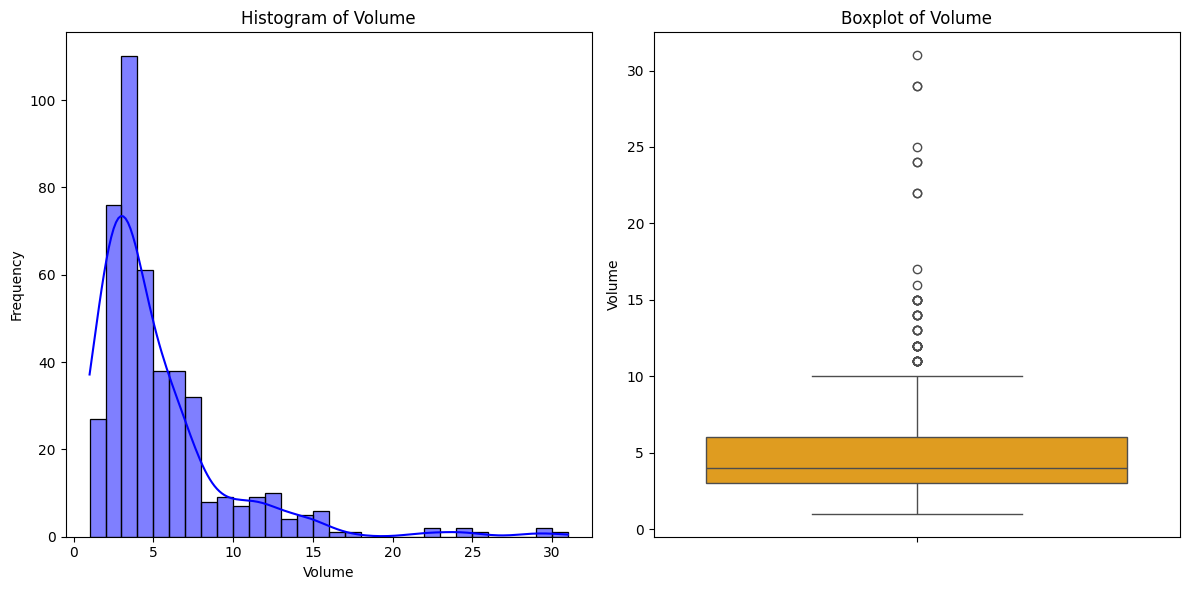

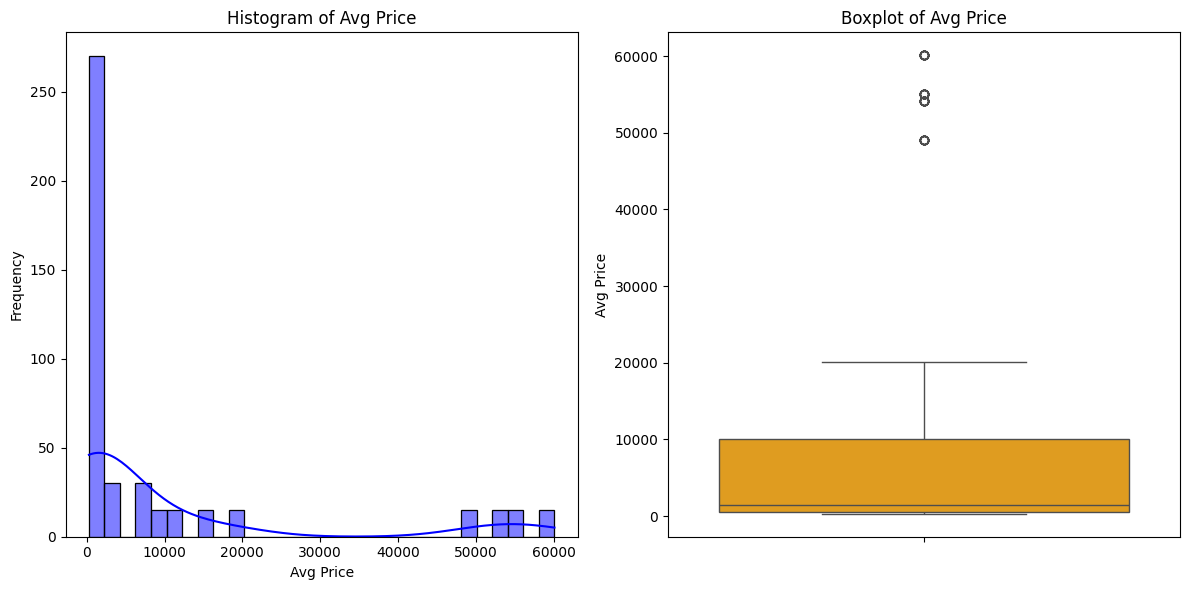

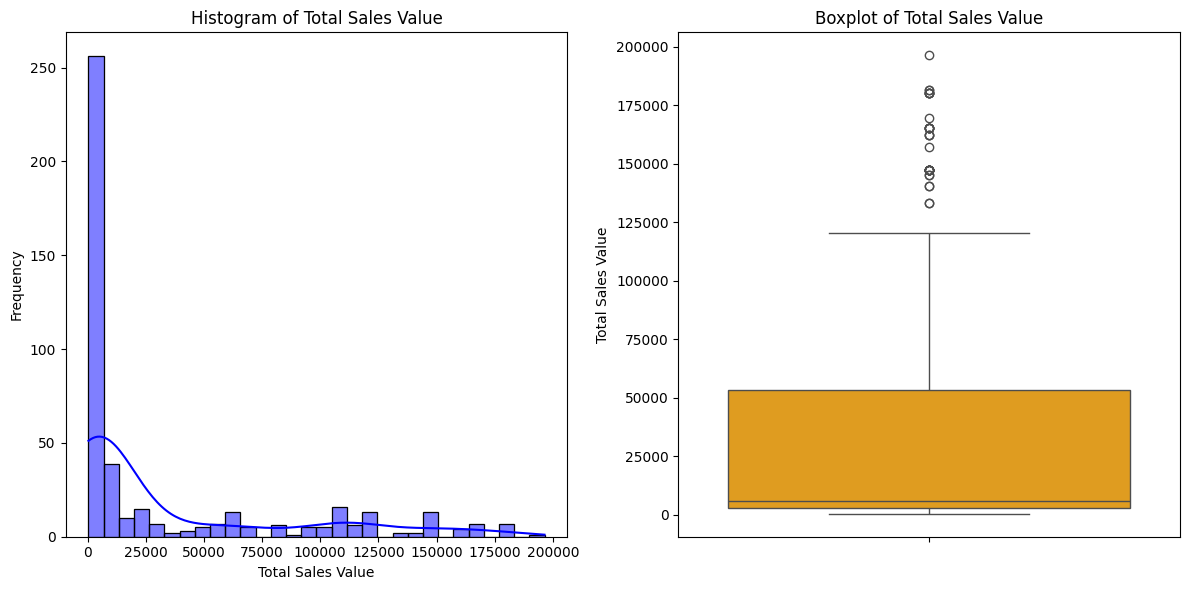

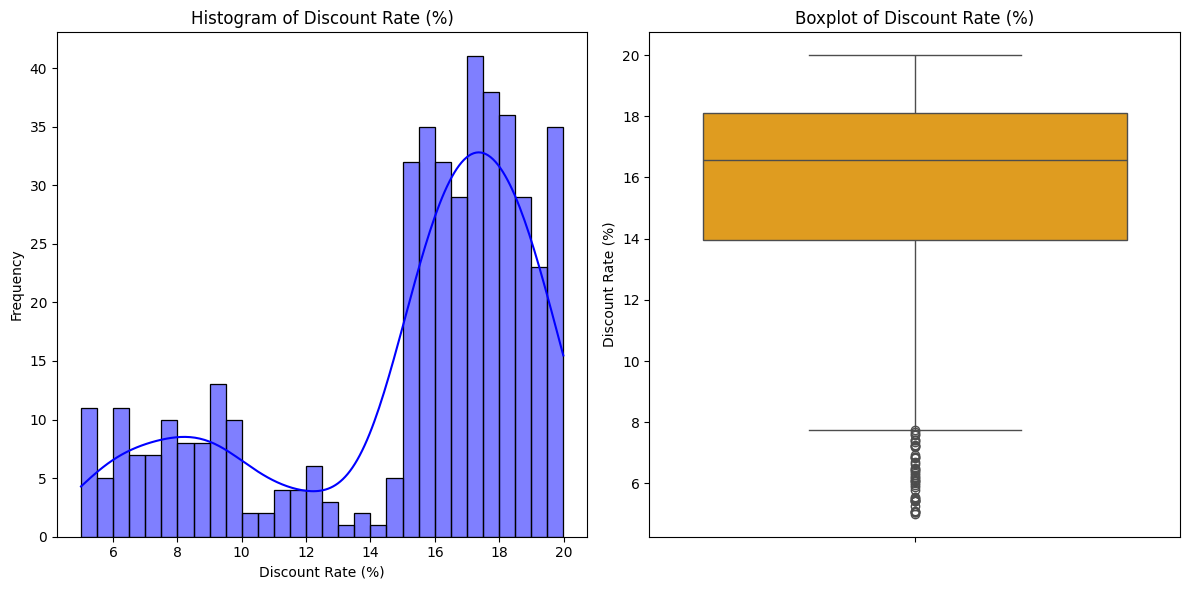

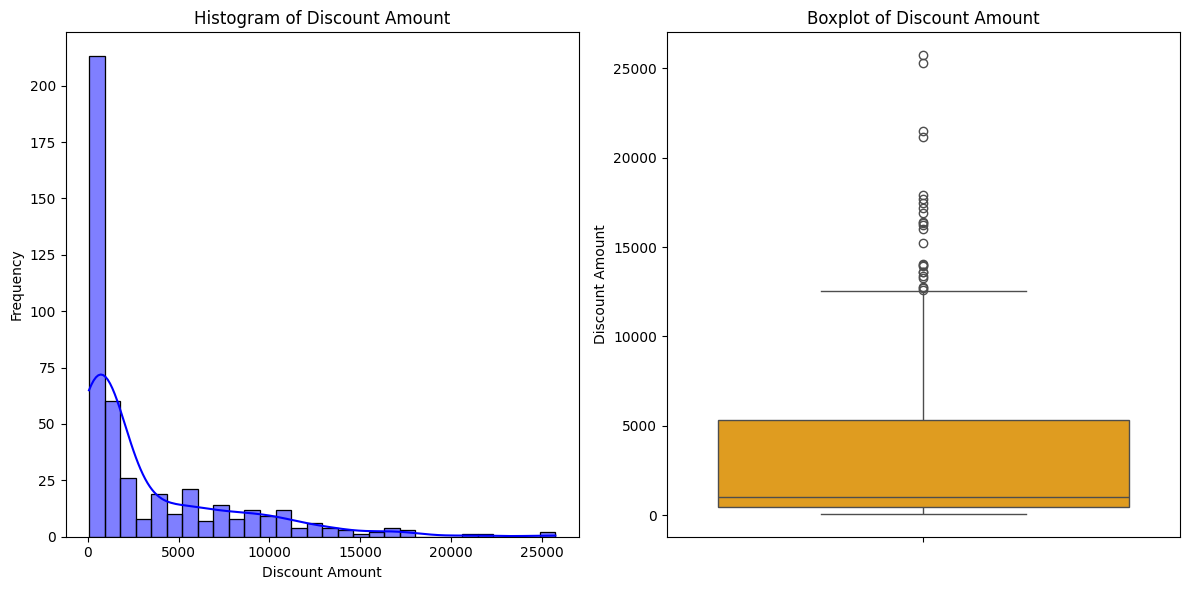

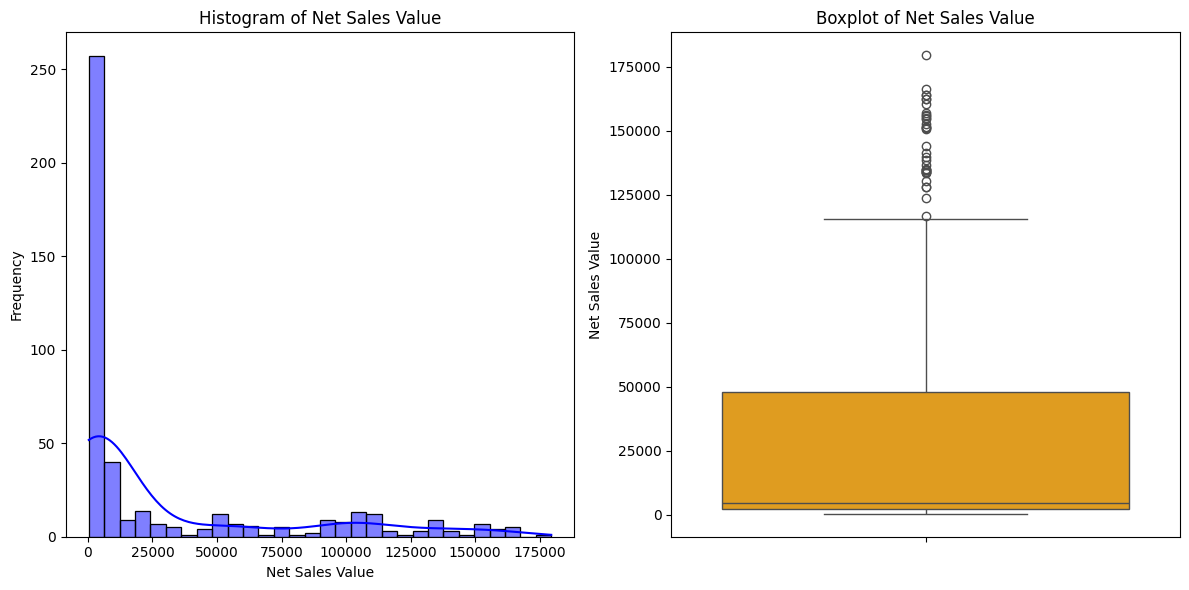

In [ ]:
# Histograms and Boxplots for Numerical Columns
for column in numerical_columns:
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True, bins=30, color='blue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[column], color='orange')
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

    plt.tight_layout()
    plt.show()

<ipython-input-9-e076a1d776a3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[column], palette='viridis')


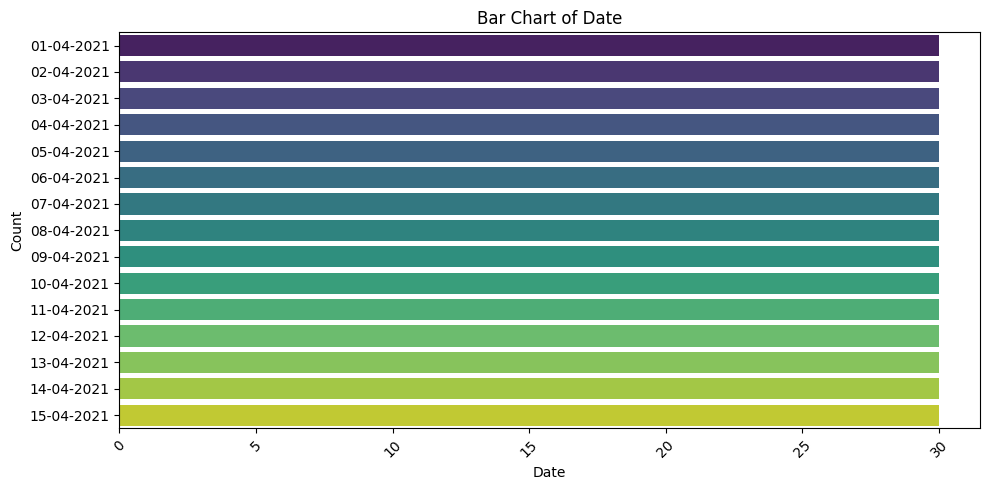

<ipython-input-9-e076a1d776a3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[column], palette='viridis')


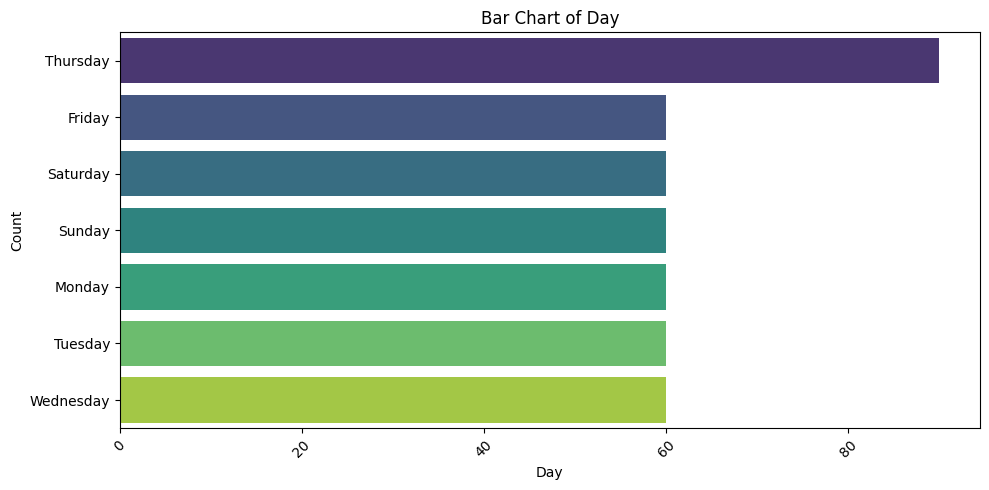

<ipython-input-9-e076a1d776a3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[column], palette='viridis')


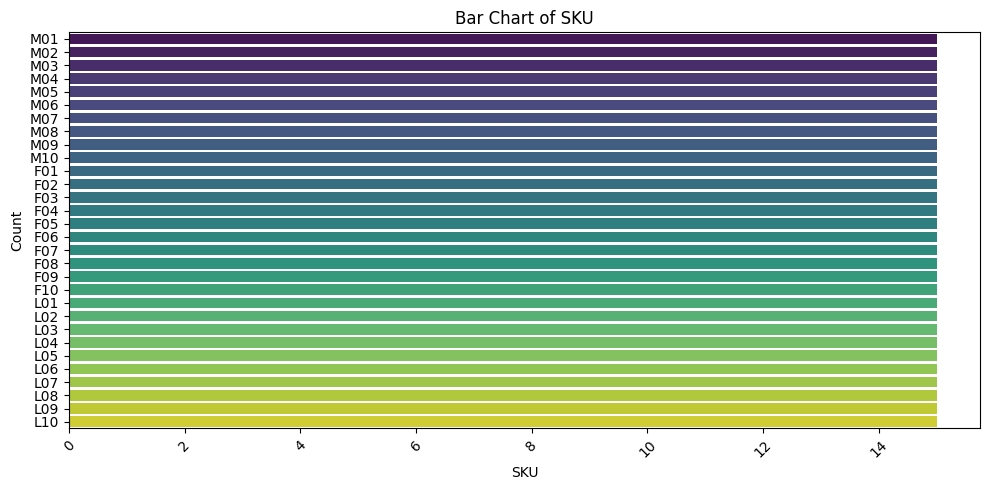

<ipython-input-9-e076a1d776a3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[column], palette='viridis')


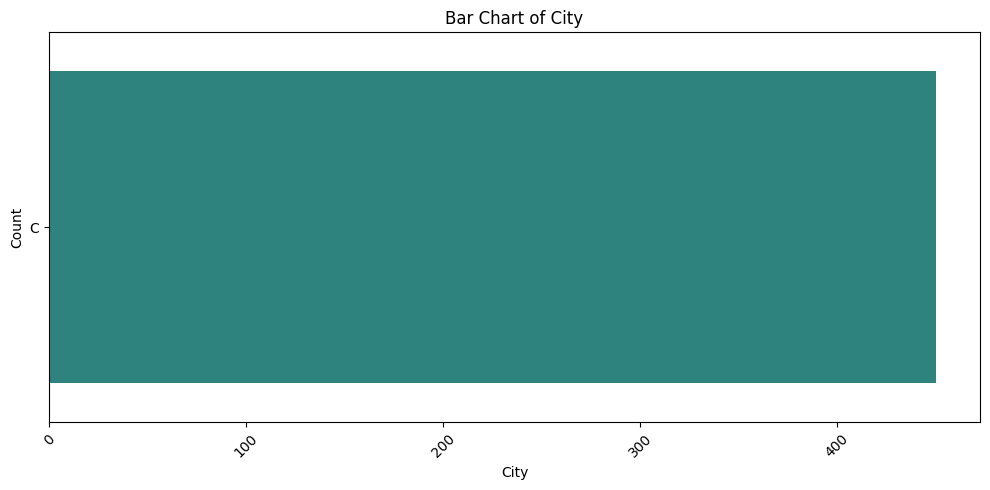

<ipython-input-9-e076a1d776a3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[column], palette='viridis')


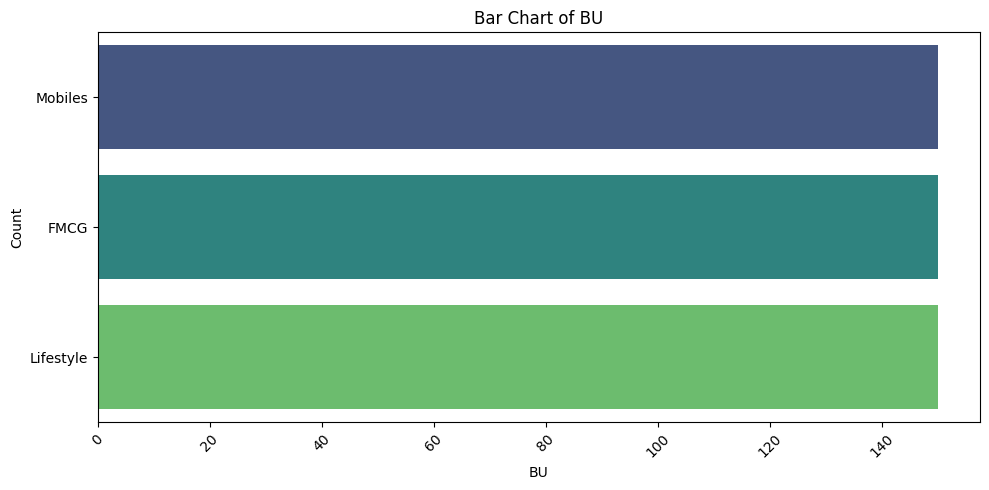

<ipython-input-9-e076a1d776a3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[column], palette='viridis')


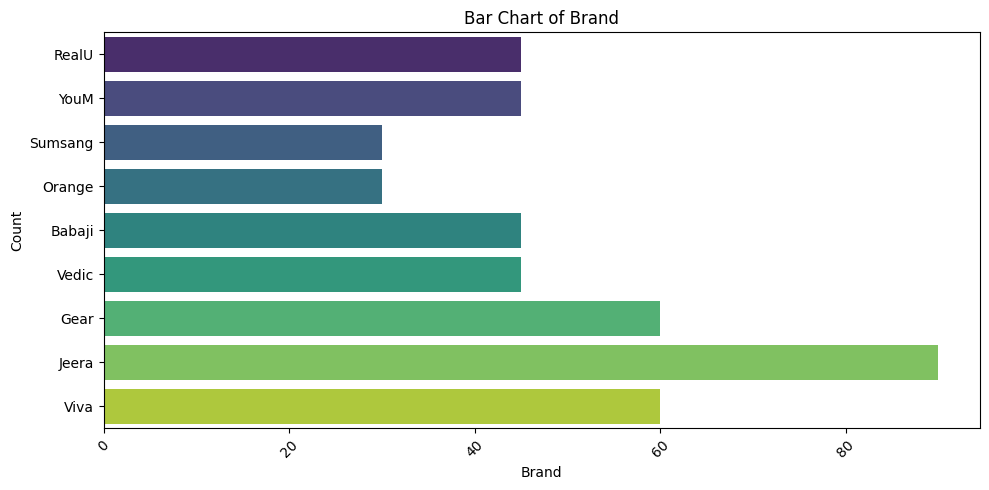

<ipython-input-9-e076a1d776a3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[column], palette='viridis')


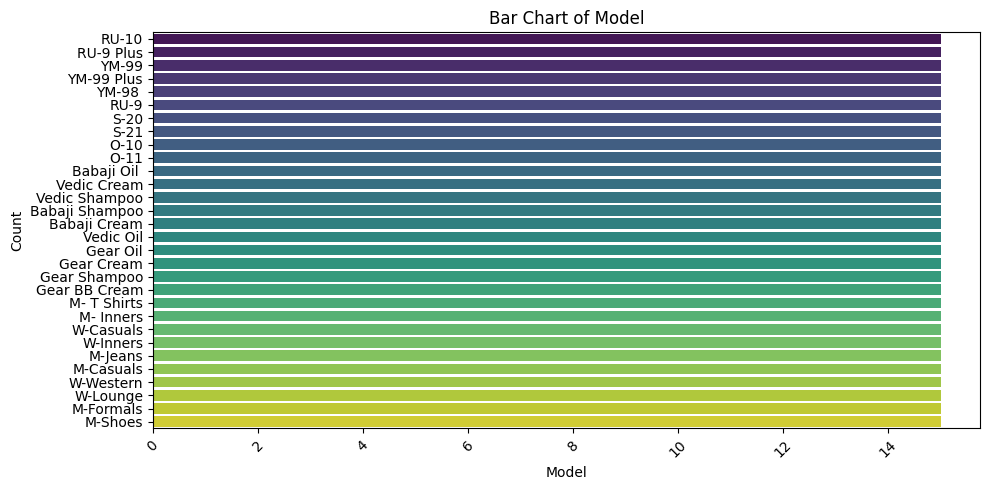

In [ ]:
# Bar Charts for Categorical Columns
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data[column], palette='viridis')
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
# Standardization of Numerical Variables
scaler = StandardScaler()
standardized_data = pd.DataFrame(
    scaler.fit_transform(data[numerical_columns]),
    columns=numerical_columns
)
# Before and After Comparison of Standardization
print("\nBefore Standardization (Preview):")
print(data[numerical_columns].head())
print("\nAfter Standardization (Preview):")
print(standardized_data.head())


Before Standardization (Preview):
   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  

After Standardization (Preview):
     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.2

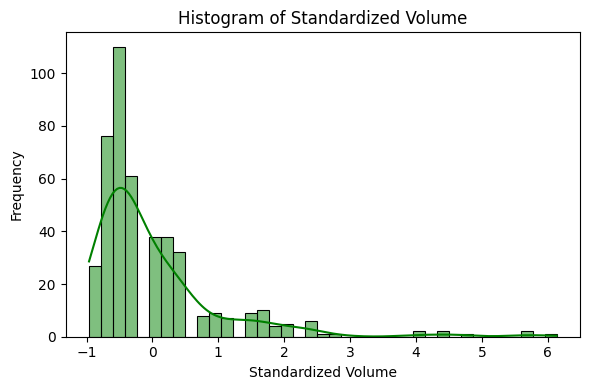

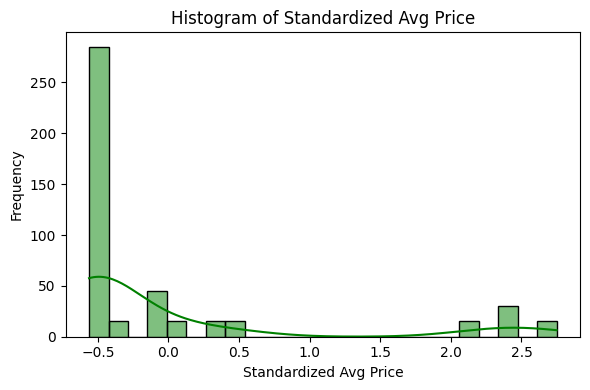

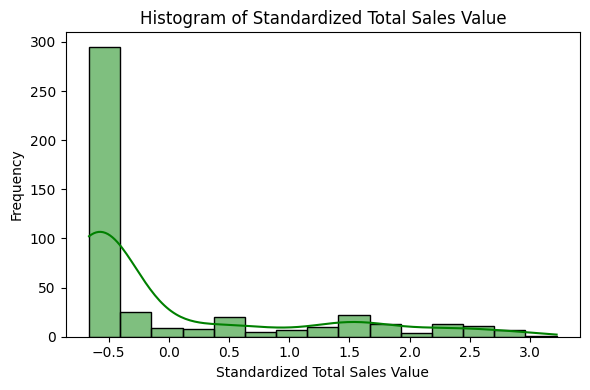

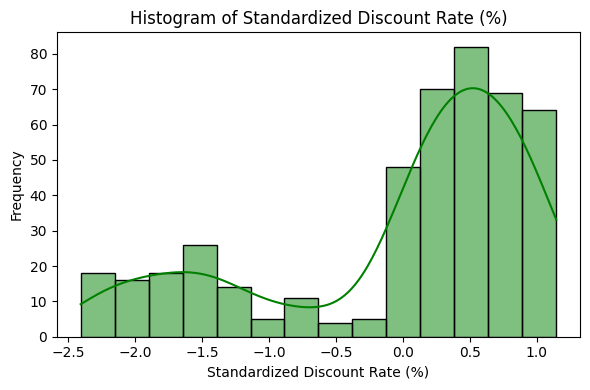

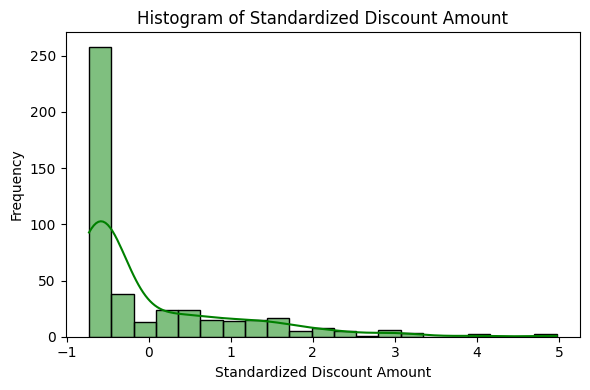

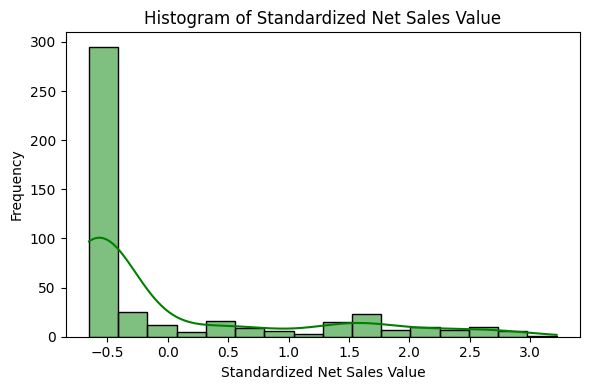

In [ ]:
# Histograms for Standardized Data
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(standardized_data[column], kde=True, color='green')
    plt.title(f'Histogram of Standardized {column}')
    plt.xlabel(f'Standardized {column}')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


In [ ]:
# Conversion of Categorical Data into Dummy Variables
encoded_data = pd.get_dummies(data[categorical_columns], drop_first=True)
print("\nDummy Variables (Preview):")
print(encoded_data.head())

# Concatenating Numerical and Encoded Data
final_data = pd.concat([standardized_data, encoded_data], axis=1)
print("\nTransformed Dataset (Preview):")
print(final_data.head())


Dummy Variables (Preview):
   Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  Date_05-04-2021  \
0            False            False            False            False   
1            False            False            False            False   
2            False            False            False            False   
3            False            False            False            False   
4            False            False            False            False   

   Date_06-04-2021  Date_07-04-2021  Date_08-04-2021  Date_09-04-2021  \
0            False            False            False            False   
1            False            False            False            False   
2            False            False            False            False   
3            False            False            False            False   
4            False            False            False            False   

   Date_10-04-2021  Date_11-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0            F